In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random

# Pobranie danych
 Na tym etapie robimy wstepne przetworzenie tzn. skalujemy obrazy do rozmiaru 28 x 28

In [111]:
# folder z danymi
data_folder = 'data/ocr'

In [121]:
# tworze listy na atrybuty i etykiety (X, y)
images = []
labels = []

# pobranie i przetworzenie obrazow
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):
        label = str(folder_name)  # konwersja nazwy folderu na etykietę (cyfrę/litere)
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            image = imread(image_path, as_gray=True)  # wczytanie obrazu w skali szarości
            resized_image = resize(image, (28, 28))  # skalowanie obrazu do rozmiaru 28x28 pikseli
            images.append(resized_image)
            labels.append(label)

# konwersja list na tablice numpy 
images = np.array(images)
labels = np.array(labels)

In [148]:
# przykladowa obserwacja 
images[0]

array([[0.75658764, 0.74956483, 0.74890456, 0.7429972 , 0.74791667,
        0.75183323, 0.75542467, 0.74820178, 0.73129002, 0.73964586,
        0.73401611, 0.72066076, 0.72308673, 0.72147859, 0.71337535,
        0.70815576, 0.71064426, 0.71910014, 0.72467737, 0.73877551,
        0.74254952, 0.75042017, 0.75503952, 0.74812925, 0.74292717,
        0.74959984, 0.75307373, 0.76022659],
       [0.75253601, 0.75331633, 0.74736645, 0.76442577, 0.75260604,
        0.74355742, 0.74072629, 0.74177171, 0.71722939, 0.68492647,
        0.63753501, 0.58366347, 0.55855342, 0.53461635, 0.51212985,
        0.51604142, 0.53056473, 0.55801821, 0.60282863, 0.65186074,
        0.7057398 , 0.7307473 , 0.74488796, 0.75566977, 0.76167717,
        0.75446929, 0.74731893, 0.74939976],
       [0.7504977 , 0.75452931, 0.7602466 , 0.75392157, 0.75564476,
        0.74929722, 0.72428221, 0.67405712, 0.59808173, 0.49865196,
        0.40670518, 0.32844888, 0.27213886, 0.23867297, 0.21956283,
        0.2260004 , 0.2510

In [149]:
# przykladowa etykieta
labels[0]

'0'

# Wstepna analiza i przetwarzanie danych

In [123]:
from sklearn.preprocessing import LabelEncoder

# obiekt LabelEncoder numruje klasy od 0 do n-1
label_encoder = LabelEncoder()

# transformacja etykiet na numeryczne
y = label_encoder.fit_transform(labels)
X = images

class_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Przyporządkowanie klas:")
print(class_mapping)

Przyporządkowanie klas:
{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


In [124]:
X.shape, y.shape

((21636, 28, 28), (21636,))

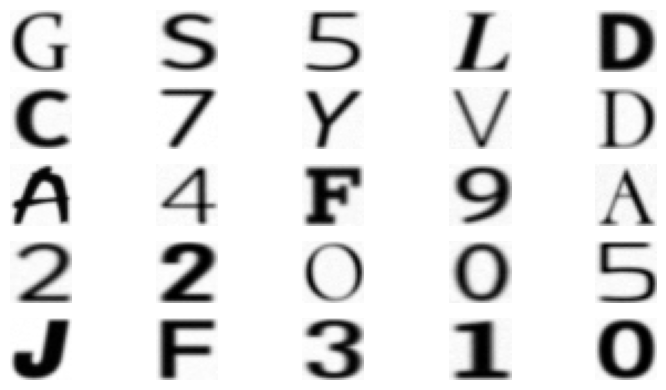

In [140]:
import matplotlib.pyplot as plt
import random

# liczba przykładowych obrazów do wyświetlenia
num_examples = 5 * 5

# wybieramy losowo indexy
random_indices = random.sample(range(len(X_train)), num_examples)

# wyswietlenie siatki obrazkow
fig, axes = plt.subplots(5, 5, figsize=(8, 4))

for i, idx in enumerate(random_indices):
    row = i // 5
    col = i % 5
    img = X_train[idx]
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


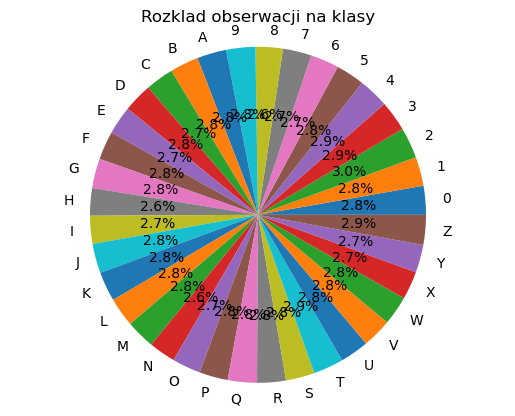

In [187]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0,
                 0, 0, 0, 0, 0, 0, 
                 0, 0, 0, 0, 0, 0) , 
        labels=list(class_mapping.values()),
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Rozklad obserwacji na klasy')
plt.show()

## Podzial danych

In [234]:
import numpy as np
from sklearn.model_selection import train_test_split

# podzial danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=96)

print("Liczba obrazów w zbiorze treningowym:", len(X_train))
print("Liczba obrazów w zbiorze testowym:", len(X_test))


# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=96)
# print("Liczba obrazów w zbiorze walidacyjnym:", len(X_val))
# na tym etaie nie wydzielam zbioru walidacyjnego, poniewaz bede korzystac z cross-validation przy grid searchu
# a modul GridSearchCV zostanie tak ustawiony, ze podzieli sobie dane treningowe na podzbiory treningowe i walidacyjne 

Liczba obrazów w zbiorze treningowym: 17308
Liczba obrazów w zbiorze testowym: 4328


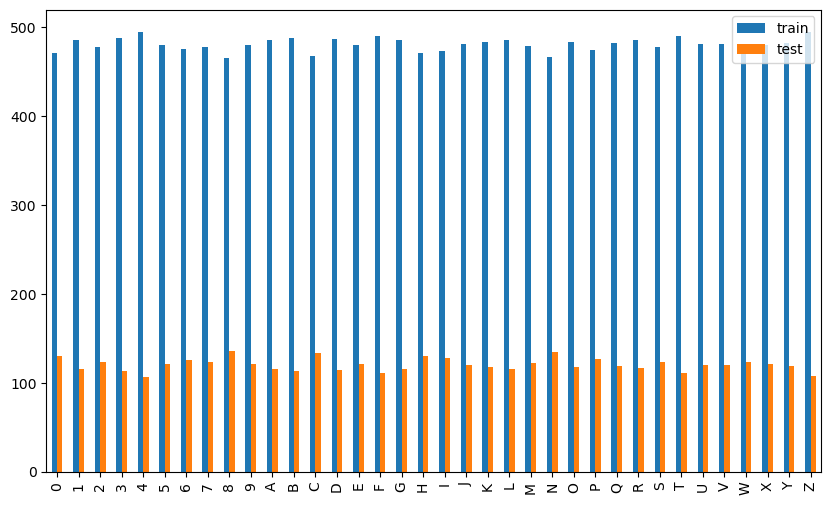

In [235]:
import pandas as pd

_, train_counts = np.unique(y_train, return_counts=True)
# _, val_counts = np.unique(y_val, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

# rozklad klas w zbiorach train val i test
fig, ax = plt.subplots(figsize=(10, 6)) 
pd.DataFrame({'train': train_counts,
#               'val': val_counts,
              'test': test_counts},
             index=list(class_mapping.values())
            ).plot.bar(ax=ax)

plt.show()

# Baseline - KNN

In [236]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# spłaszczenie obrazów do wektorów jednowymiarowych
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

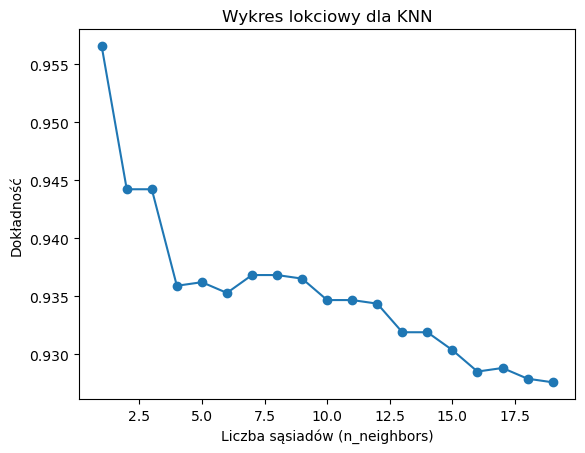

In [237]:
# przygotowanie list do przechowywania metryk wydajności
accuracies = []

# testujemy rozne warianty n_neighbors
for n_neighbors in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_flat, y_train)
    accuracy = knn.score(X_val_flat, y_val)
    accuracies.append(accuracy)

# wykres lokciowy
plt.plot(range(1, 20), accuracies, marker='o')
plt.xlabel('Liczba sąsiadów (n_neighbors)')
plt.ylabel('Dokładność')
plt.title('Wykres lokciowy dla KNN')
plt.show()

In [238]:
N = 3

In [239]:
# trenowanie modelu KNN na zbiorze treningowym
knn = KNeighborsClassifier(n_neighbors=N)
knn.fit(X_train_flat, y_train)

# ocena modelu na zbiorze testowym
test_accuracy = knn.score(X_test_flat, y_test)
print("Dokładność modelu na zbiorze testowym:", test_accuracy)

Dokładność modelu na zbiorze testowym: 0.9329944547134935


# Model CNN

In [240]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape # , X_val.shape, y_val.shape

((17308, 28, 28), (17308,), (4328, 28, 28), (4328,))

In [241]:
# wydzielamy zbior walidacyjny 

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.25, random_state=96)

print("Liczba obrazów w zbiorze treningowym:", len(X_train2))
print("Liczba obrazów w zbiorze walidacyjnym:", len(X_val2))
print("Liczba obrazów w zbiorze testowym:", len(X_test))

Liczba obrazów w zbiorze treningowym: 12981
Liczba obrazów w zbiorze walidacyjnym: 4327
Liczba obrazów w zbiorze testowym: 4328


### Parametry modelu CNN - wersja eksperymantalna

W pierwszym modelu eksperymentalnym ustawilismy dwie warstwy konwolucyjne z poolingiem oraz warstwe zbierajaca i dwie warstwy geste.

1. tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):
    - 32 filtry konwolucyjne o rozmiarze (3,3), # generuja 32 mapy cech (map_feature) 
    - f. aktywacji RELU, 
    - wejście jako obrazy 28x28 pikseli w jednej skali odcieni szarości
2. tf.keras.layers.MaxPooling2D((2, 2)):
    - dla kazdego okna 2x2 pikseli wybierane jest maksimum wartosci
5. tf.keras.layers.Flatten():
    - warstwa zbierajaca 
    - "splaszcza" dwuwymiarowe mapy cech na jednowymiarowy wektor 
    - istotna przed podaniem sygnalu do warstwy gestej Dense 
6. tf.keras.layers.Dense(64, activation='relu'):
    - 64 neurony w warstwie gestej 
    - f. aktywacji RELU 
7. tf.keras.layers.Dense(36, activation='softmax'): 
    - 36 neuronów w warstwie gęstej wyjściowej 
    - f. aktywacji SOFTMAX (przypisuje prawdopodobienstwo przynalezenia do każdej klasy)



Warstwy konwolucyjne (Conv2D) służą do wykrywania cech w danych obrazowych, warstwy pooling (MaxPooling2D) zmniejszają rozmiar map cech, a warstwy gęste (Dense) obsługują klasyfikację i generują odpowiedzi dla każdej klasy.


In [264]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])


### Kompilacja modelu CNN - wersja eksperymentalna

- Adam (Adaptive Moment Estimation) to adaptacyjna metoda optymalizacji, która dostosowuje tempo uczenia na podstawie obserwacji gradientu w czasie. Adam łączy w sobie zalety dwóch innych optymalizatorów: AdaGrad i RMSProp. Jest on często używany do uczenia sieci neuronowych, ponieważ może skutecznie radzić sobie z dużymi zbiorami danych i różnymi typami parametrów.

- Sparse Categorical Crossentropy (rzadka entropia skrośna dla wieloklasowej klasyfikacji) jest funkcją straty (loss function) używaną w zadaniach klasyfikacji, gdzie istnieje więcej niż dwie możliwe klasy. W przypadku problemów wieloklasowych, gdzie etykiety klas są reprezentowane jako liczby całkowite, a nie w postaci one-hot encoding, sparse categorical crossentropy jest odpowiednią funkcją straty. Oblicza różnicę między prawdziwymi etykietami a przewidywanymi prawdopodobieństwami dla poszczególnych klas. Celem optymalizacji jest minimalizacja tej różnicy, co prowadzi do poprawy dokładności modelu.

W skrócie, "adam" jest optymalizatorem stosowanym do dostosowywania wag w procesie uczenia modelu, a "sparse_categorical_crossentropy" jest funkcją straty, która mierzy, jak dobrze model przewiduje prawdziwe etykiety w zadaniu wieloklasowej klasyfikacji.

In [265]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

### Trenowanie modelu CNN - wersja eksperymentalna

Wytrenujemy model z batch_size=128, epochs=20


- batch_size=128 oznacza, że podczas treningu modelu dane wejściowe zostaną podzielone na małe partie, nazywane "batchami", z których każda będzie zawierać 128 przykładów. Modele sieci neuronowych są trenowane za pomocą algorytmu stochastycznego spadku gradientu (SGD), który aktualizuje wagi modelu na podstawie gradientu funkcji kosztu obliczonego na podstawie pojedynczego batcha. Podział danych na batche pozwala na równoległe obliczenia i skrócenie czasu treningu, a także może pomóc w uniknięciu problemów związanych z brakiem pamięci, jeśli zestaw danych jest duży.

- epochs=20 oznacza, że cały zestaw danych treningowych będzie używany do treningu modelu przez 20 epok. Epoka to jedno przejście przez cały zestaw danych treningowych. Podczas jednej epoki model przetwarza wszystkie batche danych treningowych, oblicza gradienty, aktualizuje wagi i ocenia postęp nauki. Wyższa liczba epok może pozwolić modelowi na lepsze dostosowanie się do danych treningowych, ale może również zwiększyć ryzyko przeuczenia (overfittingu) modelu na danych treningowych.

W skrócie, batch_size określa liczbę przykładów w jednym batchu podczas treningu, a epochs określa liczbę przejść przez cały zestaw danych treningowych podczas treningu modelu.

In [266]:
history = model.fit(X_train2, y_train2, batch_size=128, epochs=20, validation_data = [X_val2, y_val2])

Epoch 1/20
102/102 [==============================] - 2s 19ms/step - loss: 1.9297 - accuracy: 0.5331 - val_loss: 0.7026 - val_accuracy: 0.8218
Epoch 2/20
102/102 [==============================] - 2s 18ms/step - loss: 0.4994 - accuracy: 0.8748 - val_loss: 0.4264 - val_accuracy: 0.8990
Epoch 3/20
102/102 [==============================] - 2s 18ms/step - loss: 0.3541 - accuracy: 0.9116 - val_loss: 0.3474 - val_accuracy: 0.9166
Epoch 4/20
102/102 [==============================] - 2s 19ms/step - loss: 0.2912 - accuracy: 0.9243 - val_loss: 0.3193 - val_accuracy: 0.9170
Epoch 5/20
102/102 [==============================] - 2s 19ms/step - loss: 0.2504 - accuracy: 0.9327 - val_loss: 0.2709 - val_accuracy: 0.9351
Epoch 6/20
102/102 [==============================] - 2s 19ms/step - loss: 0.2267 - accuracy: 0.9376 - val_loss: 0.2517 - val_accuracy: 0.9383
Epoch 7/20
102/102 [==============================] - 2s 18ms/step - loss: 0.1921 - accuracy: 0.9465 - val_loss: 0.2435 - val_accuracy: 0.9383

In [267]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "train acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "train loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

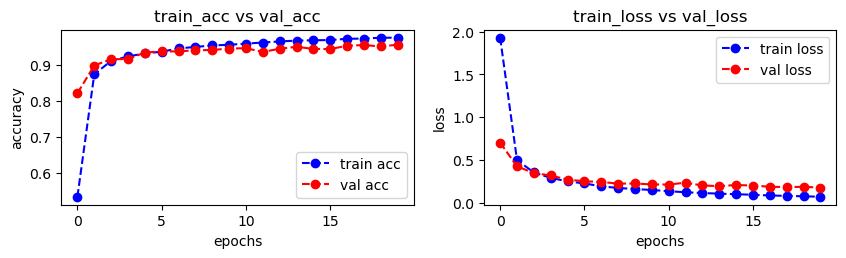

In [268]:
plot_accuracy_loss(history)

### Na podstawie wykresów dokladnosci i straty dla zbiorow treningowego i walidacyjnego zaleznosci od liczby epok wybieramy 15 epok

In [269]:
history = model.fit(X_train2, y_train2, batch_size=128, epochs=15, validation_data = [X_val2, y_val2])

Epoch 1/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0653 - accuracy: 0.9786 - val_loss: 0.1777 - val_accuracy: 0.9586
Epoch 2/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0625 - accuracy: 0.9797 - val_loss: 0.2058 - val_accuracy: 0.9485
Epoch 3/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0608 - accuracy: 0.9797 - val_loss: 0.2000 - val_accuracy: 0.9505
Epoch 4/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0570 - accuracy: 0.9821 - val_loss: 0.1814 - val_accuracy: 0.9547
Epoch 5/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0510 - accuracy: 0.9828 - val_loss: 0.1919 - val_accuracy: 0.9526
Epoch 6/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0527 - accuracy: 0.9825 - val_loss: 0.1783 - val_accuracy: 0.9584
Epoch 7/15
102/102 [==============================] - 2s 19ms/step - loss: 0.0502 - accuracy: 0.9826 - val_loss: 0.1828 - val_accuracy: 0.9609

### Trenowanie modelu CNN - wersja eksperymentalna

In [270]:
test_loss = model.evaluate(X_test, y_test)

136/136 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.9612


In [271]:
model.summary()

Model: "sequential_505"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_942 (Conv2D)         (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_855 (MaxPooli  (None, 13, 13, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_274 (Flatten)       (None, 5408)              0         
                                                                 
 dense_384 (Dense)           (None, 64)                346176    
                                                                 
 dense_385 (Dense)           (None, 36)                2340      
                                                                 
Total params: 348,836
Trainable params: 348,836
Non-trainable params: 0
______________________________________________

# Grid search - strojenie modelu (liczba warstw, liczba filtrów, liczba neuronów)

In [250]:
# !pip install scikeras

In [251]:
# import numpy as np
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Tworzenie modelu KerasClassifier z modelem Sequential
# def create_model(num_filters=32, num_layers=2):
#     model = Sequential()

#     model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))

#     for _ in range(num_layers - 1):
#         model.add(Conv2D(num_filters, (3, 3), activation='relu'))
#         model.add(MaxPooling2D((2, 2)))

#     model.add(Flatten())
#     model.add(Dense(64, activation='relu'))
#     model.add(Dense(36, activation='softmax'))

#     model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     return model

# # Tworzenie modelu KerasClassifier
# keras_model = KerasClassifier(build_fn=create_model)

# # Definicja parametrów do przetestowania
# param_grid = {
#     'num_filters': [32, 64, 128],
#     'num_layers': [2, 3, 4],
#     'batch_size': [128, 256],
#     'epochs': [15, 20, 30]
# }

# # Tworzenie modelu do przeszukiwania siatki (grid search)
# grid_search = GridSearchCV(keras_model, param_grid, cv=3)

# # Trenowanie modelu na danych treningowych
# grid_search.fit(X_train, y_train)

C:\Users\m-lab\AppData\Local\Temp\ipykernel_17948\4030484275.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)


Epoch 1/15
91/91 [==============================] - 10s 92ms/step - loss: 2.1927 - accuracy: 0.4596
Epoch 2/15
91/91 [==============================] - 8s 92ms/step - loss: 0.5327 - accuracy: 0.8641
Epoch 3/15
91/91 [==============================] - 9s 95ms/step - loss: 0.3829 - accuracy: 0.9046
Epoch 4/15
91/91 [==============================] - 9s 98ms/step - loss: 0.3140 - accuracy: 0.9199
Epoch 5/15
91/91 [==============================] - 8s 86ms/step - loss: 0.2670 - accuracy: 0.9294
Epoch 6/15
91/91 [==============================] - 8s 87ms/step - loss: 0.2384 - accuracy: 0.9382
Epoch 7/15
91/91 [==============================] - 8s 84ms/step - loss: 0.2117 - accuracy: 0.9425
Epoch 8/15
91/91 [==============================] - 8s 86ms/step - loss: 0.1905 - accuracy: 0.9467
Epoch 9/15
91/91 [==============================] - 7s 82ms/step - loss: 0.1733 - accuracy: 0.9494
Epoch 10/15
91/91 [==============================] - 8s 85ms/step - loss: 0.1594 - accuracy: 0.9521
Epoch 11

Epoch 4/15
91/91 [==============================] - 7s 76ms/step - loss: 0.7580 - accuracy: 0.7816
Epoch 5/15
91/91 [==============================] - 7s 73ms/step - loss: 0.6644 - accuracy: 0.8084
Epoch 6/15
91/91 [==============================] - 7s 79ms/step - loss: 0.5953 - accuracy: 0.8249
Epoch 7/15
91/91 [==============================] - 6s 71ms/step - loss: 0.5518 - accuracy: 0.8418
Epoch 8/15
91/91 [==============================] - 7s 75ms/step - loss: 0.5163 - accuracy: 0.8488
Epoch 9/15
91/91 [==============================] - 7s 81ms/step - loss: 0.4776 - accuracy: 0.8580
Epoch 10/15
91/91 [==============================] - 7s 81ms/step - loss: 0.4488 - accuracy: 0.8683
Epoch 11/15
91/91 [==============================] - 6s 70ms/step - loss: 0.4320 - accuracy: 0.8702
Epoch 12/15
91/91 [==============================] - 7s 72ms/step - loss: 0.4125 - accuracy: 0.8759
Epoch 13/15
91/91 [==============================] - 6s 70ms/step - loss: 0.3965 - accuracy: 0.8799
Epoch 

91/91 [==============================] - 10s 106ms/step - loss: 0.5201 - accuracy: 0.8522
Epoch 6/15
91/91 [==============================] - 11s 117ms/step - loss: 0.4618 - accuracy: 0.8678
Epoch 7/15
91/91 [==============================] - 10s 110ms/step - loss: 0.4405 - accuracy: 0.8741
Epoch 8/15
91/91 [==============================] - 11s 117ms/step - loss: 0.4161 - accuracy: 0.8777
Epoch 9/15
91/91 [==============================] - 12s 130ms/step - loss: 0.3803 - accuracy: 0.8869
Epoch 10/15
91/91 [==============================] - 10s 114ms/step - loss: 0.3664 - accuracy: 0.8857
Epoch 11/15
91/91 [==============================] - 10s 109ms/step - loss: 0.3551 - accuracy: 0.8938
Epoch 12/15
91/91 [==============================] - 10s 109ms/step - loss: 0.3346 - accuracy: 0.8941
Epoch 13/15
91/91 [==============================] - 11s 116ms/step - loss: 0.3088 - accuracy: 0.8994
Epoch 14/15
91/91 [==============================] - 11s 119ms/step - loss: 0.3005 - accuracy: 0.9

91/91 [==============================] - 21s 227ms/step - loss: 0.4013 - accuracy: 0.8760
Epoch 7/15
91/91 [==============================] - 21s 226ms/step - loss: 0.3617 - accuracy: 0.8885
Epoch 8/15
91/91 [==============================] - 20s 221ms/step - loss: 0.3424 - accuracy: 0.8907
Epoch 9/15
91/91 [==============================] - 21s 230ms/step - loss: 0.3244 - accuracy: 0.8950
Epoch 10/15
91/91 [==============================] - 21s 227ms/step - loss: 0.2908 - accuracy: 0.9047
Epoch 11/15
91/91 [==============================] - 21s 232ms/step - loss: 0.2740 - accuracy: 0.9080
Epoch 12/15
91/91 [==============================] - 22s 237ms/step - loss: 0.2644 - accuracy: 0.9098
Epoch 13/15
91/91 [==============================] - 20s 223ms/step - loss: 0.2390 - accuracy: 0.9142
Epoch 14/15
91/91 [==============================] - 20s 224ms/step - loss: 0.2275 - accuracy: 0.9206
Epoch 15/15
46/46 [==============================] - 3s 60ms/step - loss: 0.3740 - accuracy: 0.88

91/91 [==============================] - 8s 91ms/step - loss: 0.0939 - accuracy: 0.9680
Epoch 19/20
91/91 [==============================] - 8s 90ms/step - loss: 0.0784 - accuracy: 0.9742
Epoch 20/20
46/46 [==============================] - 1s 25ms/step - loss: 0.2417 - accuracy: 0.9435
Epoch 1/20
91/91 [==============================] - 8s 82ms/step - loss: 2.3818 - accuracy: 0.4076
Epoch 2/20
91/91 [==============================] - 8s 92ms/step - loss: 0.6183 - accuracy: 0.8405
Epoch 3/20
91/91 [==============================] - 8s 89ms/step - loss: 0.4127 - accuracy: 0.8940
Epoch 4/20
91/91 [==============================] - 8s 85ms/step - loss: 0.3288 - accuracy: 0.9152
Epoch 5/20
91/91 [==============================] - 8s 84ms/step - loss: 0.2781 - accuracy: 0.9285
Epoch 6/20
91/91 [==============================] - 8s 83ms/step - loss: 0.2507 - accuracy: 0.9326
Epoch 7/20
91/91 [==============================] - 7s 82ms/step - loss: 0.2167 - accuracy: 0.9396
Epoch 8/20
91/91 [=

91/91 [==============================] - 7s 77ms/step - loss: 0.3670 - accuracy: 0.8879
Epoch 17/20
91/91 [==============================] - 7s 77ms/step - loss: 0.3540 - accuracy: 0.8906
Epoch 18/20
91/91 [==============================] - 7s 77ms/step - loss: 0.3445 - accuracy: 0.8949
Epoch 19/20
91/91 [==============================] - 7s 78ms/step - loss: 0.3333 - accuracy: 0.8957
Epoch 20/20
46/46 [==============================] - 1s 27ms/step - loss: 0.4297 - accuracy: 0.8830
Epoch 1/20
91/91 [==============================] - 12s 107ms/step - loss: 1.9111 - accuracy: 0.5187
Epoch 2/20
91/91 [==============================] - 9s 103ms/step - loss: 0.4721 - accuracy: 0.8791
Epoch 3/20
91/91 [==============================] - 26s 285ms/step - loss: 0.3419 - accuracy: 0.9122
Epoch 4/20
91/91 [==============================] - 11s 125ms/step - loss: 0.2884 - accuracy: 0.9230
Epoch 5/20
91/91 [==============================] - 10s 106ms/step - loss: 0.2335 - accuracy: 0.9360
Epoch 6/

91/91 [==============================] - 11s 116ms/step - loss: 0.3233 - accuracy: 0.8988
Epoch 14/20
91/91 [==============================] - 10s 109ms/step - loss: 0.3028 - accuracy: 0.9044
Epoch 15/20
91/91 [==============================] - 11s 120ms/step - loss: 0.2880 - accuracy: 0.9083
Epoch 16/20
91/91 [==============================] - 11s 123ms/step - loss: 0.2736 - accuracy: 0.9123
Epoch 17/20
91/91 [==============================] - 11s 119ms/step - loss: 0.2597 - accuracy: 0.9142
Epoch 18/20
91/91 [==============================] - 10s 109ms/step - loss: 0.2504 - accuracy: 0.9179
Epoch 19/20
91/91 [==============================] - 11s 117ms/step - loss: 0.2506 - accuracy: 0.9168
Epoch 20/20
46/46 [==============================] - 2s 33ms/step - loss: 0.4304 - accuracy: 0.8744
Epoch 1/20
91/91 [==============================] - 12s 111ms/step - loss: 2.6058 - accuracy: 0.2923
Epoch 2/20
91/91 [==============================] - 10s 115ms/step - loss: 0.9353 - accuracy: 0.7

91/91 [==============================] - 20s 218ms/step - loss: 0.1088 - accuracy: 0.9658
Epoch 11/20
91/91 [==============================] - 20s 217ms/step - loss: 0.0993 - accuracy: 0.9669
Epoch 12/20
91/91 [==============================] - 20s 224ms/step - loss: 0.0882 - accuracy: 0.9697
Epoch 13/20
91/91 [==============================] - 20s 218ms/step - loss: 0.1009 - accuracy: 0.9656
Epoch 14/20
91/91 [==============================] - 20s 223ms/step - loss: 0.0728 - accuracy: 0.9744
Epoch 15/20
91/91 [==============================] - 20s 218ms/step - loss: 0.0644 - accuracy: 0.9768
Epoch 16/20
91/91 [==============================] - 20s 221ms/step - loss: 0.0583 - accuracy: 0.9800
Epoch 17/20
91/91 [==============================] - 22s 238ms/step - loss: 0.0596 - accuracy: 0.9782
Epoch 18/20
91/91 [==============================] - 20s 225ms/step - loss: 0.0505 - accuracy: 0.9810
Epoch 19/20
91/91 [==============================] - 22s 238ms/step - loss: 0.0597 - accuracy:

91/91 [==============================] - 22s 237ms/step - loss: 0.3931 - accuracy: 0.8782
Epoch 8/20
91/91 [==============================] - 22s 240ms/step - loss: 0.3477 - accuracy: 0.8910
Epoch 9/20
91/91 [==============================] - 23s 249ms/step - loss: 0.3171 - accuracy: 0.8975
Epoch 10/20
91/91 [==============================] - 23s 251ms/step - loss: 0.3039 - accuracy: 0.9012
Epoch 11/20
91/91 [==============================] - 24s 259ms/step - loss: 0.2835 - accuracy: 0.9057
Epoch 12/20
91/91 [==============================] - 21s 236ms/step - loss: 0.2700 - accuracy: 0.9071
Epoch 13/20
91/91 [==============================] - 21s 230ms/step - loss: 0.2530 - accuracy: 0.9122
Epoch 14/20
91/91 [==============================] - 22s 244ms/step - loss: 0.2544 - accuracy: 0.9131
Epoch 15/20
91/91 [==============================] - 12s 132ms/step - loss: 0.2168 - accuracy: 0.9233
Epoch 16/20
91/91 [==============================] - 11s 126ms/step - loss: 0.2062 - accuracy: 0

91/91 [==============================] - 2s 23ms/step - loss: 0.2454 - accuracy: 0.9344
Epoch 7/30
91/91 [==============================] - 2s 23ms/step - loss: 0.2198 - accuracy: 0.9392
Epoch 8/30
91/91 [==============================] - 2s 24ms/step - loss: 0.2064 - accuracy: 0.9442
Epoch 9/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1813 - accuracy: 0.9488
Epoch 10/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1720 - accuracy: 0.9496
Epoch 11/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1484 - accuracy: 0.9572
Epoch 12/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1403 - accuracy: 0.9583
Epoch 13/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1262 - accuracy: 0.9627
Epoch 14/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1200 - accuracy: 0.9631
Epoch 15/30
91/91 [==============================] - 2s 23ms/step - loss: 0.1107 - accuracy: 0.9632
Epoch 16/30
91/

91/91 [==============================] - 2s 24ms/step - loss: 0.3035 - accuracy: 0.9059
Epoch 27/30
91/91 [==============================] - 2s 24ms/step - loss: 0.2993 - accuracy: 0.9083
Epoch 28/30
91/91 [==============================] - 2s 24ms/step - loss: 0.2919 - accuracy: 0.9071
Epoch 29/30
91/91 [==============================] - 2s 24ms/step - loss: 0.2891 - accuracy: 0.9081
Epoch 30/30
46/46 [==============================] - 0s 7ms/step - loss: 0.4172 - accuracy: 0.8877
Epoch 1/30
91/91 [==============================] - 4s 26ms/step - loss: 3.1070 - accuracy: 0.1590
Epoch 2/30
91/91 [==============================] - 3s 32ms/step - loss: 1.3493 - accuracy: 0.6042
Epoch 3/30
91/91 [==============================] - 3s 31ms/step - loss: 0.9244 - accuracy: 0.7282
Epoch 4/30
91/91 [==============================] - 3s 31ms/step - loss: 0.7683 - accuracy: 0.7790
Epoch 5/30
91/91 [==============================] - 3s 32ms/step - loss: 0.6882 - accuracy: 0.8044
Epoch 6/30
91/91 [

91/91 [==============================] - 5s 55ms/step - loss: 0.0850 - accuracy: 0.9704
Epoch 16/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0692 - accuracy: 0.9751
Epoch 17/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0658 - accuracy: 0.9764
Epoch 18/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0628 - accuracy: 0.9792
Epoch 19/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0594 - accuracy: 0.9782
Epoch 20/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0530 - accuracy: 0.9794
Epoch 21/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0500 - accuracy: 0.9827
Epoch 22/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0468 - accuracy: 0.9830
Epoch 23/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0475 - accuracy: 0.9817
Epoch 24/30
91/91 [==============================] - 5s 55ms/step - loss: 0.0567 - accuracy: 0.9807
Epoch 25/30


91/91 [==============================] - 5s 49ms/step - loss: 0.5781 - accuracy: 0.8368
Epoch 5/30
91/91 [==============================] - 5s 50ms/step - loss: 0.5031 - accuracy: 0.8593
Epoch 6/30
91/91 [==============================] - 5s 50ms/step - loss: 0.4634 - accuracy: 0.8651
Epoch 7/30
91/91 [==============================] - 5s 50ms/step - loss: 0.4204 - accuracy: 0.8758
Epoch 8/30
91/91 [==============================] - 4s 49ms/step - loss: 0.3960 - accuracy: 0.8817
Epoch 9/30
91/91 [==============================] - 5s 50ms/step - loss: 0.3678 - accuracy: 0.8893
Epoch 10/30
91/91 [==============================] - 4s 49ms/step - loss: 0.3539 - accuracy: 0.8951
Epoch 11/30
91/91 [==============================] - 5s 50ms/step - loss: 0.3338 - accuracy: 0.8987
Epoch 12/30
91/91 [==============================] - 4s 49ms/step - loss: 0.3149 - accuracy: 0.9002
Epoch 13/30
91/91 [==============================] - 5s 50ms/step - loss: 0.3094 - accuracy: 0.9016
Epoch 14/30
91/91

91/91 [==============================] - 9s 99ms/step - loss: 0.0344 - accuracy: 0.9861
Epoch 25/30
91/91 [==============================] - 9s 97ms/step - loss: 0.0315 - accuracy: 0.9869
Epoch 26/30
91/91 [==============================] - 9s 99ms/step - loss: 0.0308 - accuracy: 0.9873
Epoch 27/30
91/91 [==============================] - 9s 100ms/step - loss: 0.0360 - accuracy: 0.9864
Epoch 28/30
91/91 [==============================] - 9s 100ms/step - loss: 0.0454 - accuracy: 0.9828
Epoch 29/30
91/91 [==============================] - 9s 100ms/step - loss: 0.0379 - accuracy: 0.9851
Epoch 30/30
46/46 [==============================] - 1s 29ms/step - loss: 0.2580 - accuracy: 0.9501
Epoch 1/30
91/91 [==============================] - 10s 100ms/step - loss: 1.7659 - accuracy: 0.5440
Epoch 2/30
91/91 [==============================] - 9s 100ms/step - loss: 0.4405 - accuracy: 0.8895
Epoch 3/30
91/91 [==============================] - 9s 101ms/step - loss: 0.3112 - accuracy: 0.9204
Epoch 4/

91/91 [==============================] - 9s 104ms/step - loss: 0.2647 - accuracy: 0.9113
Epoch 13/30
91/91 [==============================] - 9s 104ms/step - loss: 0.2440 - accuracy: 0.9154
Epoch 14/30
91/91 [==============================] - 9s 104ms/step - loss: 0.2441 - accuracy: 0.9147
Epoch 15/30
91/91 [==============================] - 9s 104ms/step - loss: 0.2293 - accuracy: 0.9192
Epoch 16/30
91/91 [==============================] - 9s 104ms/step - loss: 0.2094 - accuracy: 0.9247
Epoch 17/30
91/91 [==============================] - 9s 104ms/step - loss: 0.1921 - accuracy: 0.9318
Epoch 18/30
91/91 [==============================] - 9s 104ms/step - loss: 0.1977 - accuracy: 0.9262
Epoch 19/30
91/91 [==============================] - 9s 104ms/step - loss: 0.1789 - accuracy: 0.9335
Epoch 20/30
91/91 [==============================] - 9s 104ms/step - loss: 0.1821 - accuracy: 0.9332
Epoch 21/30
91/91 [==============================] - 9s 103ms/step - loss: 0.1759 - accuracy: 0.9331
Ep

46/46 [==============================] - 1s 30ms/step - loss: 0.4216 - accuracy: 0.9017
Epoch 1/15
46/46 [==============================] - 2s 42ms/step - loss: 3.0260 - accuracy: 0.2529
Epoch 2/15
46/46 [==============================] - 2s 42ms/step - loss: 1.0578 - accuracy: 0.7217
Epoch 3/15
46/46 [==============================] - 2s 42ms/step - loss: 0.5957 - accuracy: 0.8508
Epoch 4/15
46/46 [==============================] - 2s 42ms/step - loss: 0.4708 - accuracy: 0.8795
Epoch 5/15
46/46 [==============================] - 2s 42ms/step - loss: 0.4068 - accuracy: 0.8958
Epoch 6/15
46/46 [==============================] - 2s 42ms/step - loss: 0.3614 - accuracy: 0.9059
Epoch 7/15
46/46 [==============================] - 2s 42ms/step - loss: 0.3126 - accuracy: 0.9207
Epoch 8/15
46/46 [==============================] - 2s 42ms/step - loss: 0.2882 - accuracy: 0.9266
Epoch 9/15
46/46 [==============================] - 2s 42ms/step - loss: 0.2589 - accuracy: 0.9314
Epoch 10/15
46/46 [==

46/46 [==============================] - 2s 47ms/step - loss: 1.4000 - accuracy: 0.6046
Epoch 4/15
46/46 [==============================] - 2s 47ms/step - loss: 1.0602 - accuracy: 0.7027
Epoch 5/15
46/46 [==============================] - 2s 48ms/step - loss: 0.8772 - accuracy: 0.7588
Epoch 6/15
46/46 [==============================] - 2s 47ms/step - loss: 0.7956 - accuracy: 0.7738
Epoch 7/15
46/46 [==============================] - 2s 48ms/step - loss: 0.7152 - accuracy: 0.8018
Epoch 8/15
46/46 [==============================] - 2s 47ms/step - loss: 0.6636 - accuracy: 0.8167
Epoch 9/15
46/46 [==============================] - 2s 47ms/step - loss: 0.6284 - accuracy: 0.8280
Epoch 10/15
46/46 [==============================] - 2s 49ms/step - loss: 0.6033 - accuracy: 0.8329
Epoch 11/15
46/46 [==============================] - 2s 48ms/step - loss: 0.5664 - accuracy: 0.8428
Epoch 12/15
46/46 [==============================] - 2s 47ms/step - loss: 0.5415 - accuracy: 0.8489
Epoch 13/15
46/46 

46/46 [==============================] - 4s 87ms/step - loss: 0.6067 - accuracy: 0.8296
Epoch 7/15
46/46 [==============================] - 4s 86ms/step - loss: 0.5461 - accuracy: 0.8467
Epoch 8/15
46/46 [==============================] - 4s 86ms/step - loss: 0.5160 - accuracy: 0.8554
Epoch 9/15
46/46 [==============================] - 4s 86ms/step - loss: 0.4961 - accuracy: 0.8593
Epoch 10/15
46/46 [==============================] - 4s 86ms/step - loss: 0.4593 - accuracy: 0.8690
Epoch 11/15
46/46 [==============================] - 4s 86ms/step - loss: 0.4309 - accuracy: 0.8771
Epoch 12/15
46/46 [==============================] - 4s 89ms/step - loss: 0.4188 - accuracy: 0.8773
Epoch 13/15
46/46 [==============================] - 4s 87ms/step - loss: 0.4146 - accuracy: 0.8761
Epoch 14/15
46/46 [==============================] - 4s 86ms/step - loss: 0.3781 - accuracy: 0.8886
Epoch 15/15
23/23 [==============================] - 1s 24ms/step - loss: 0.4374 - accuracy: 0.8762
Epoch 1/15
46/4

KeyboardInterrupt: 

In [272]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Tworzenie modelu KerasClassifier z modelem Sequential
def create_model(num_filters=32, num_layers=2):
    model = Sequential()

    model.add(Conv2D(num_filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))

    for _ in range(num_layers - 1):
        model.add(Conv2D(num_filters, (3, 3), activation='relu'))
        model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(36, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Tworzenie modelu KerasClassifier
keras_model = KerasClassifier(build_fn=create_model)

# Definicja parametrów do przetestowania
param_grid = {
    'num_filters': [32, 64],
    'num_layers': [1, 2, 3],
    'batch_size': [128, 256],
    'epochs': [15]
}

# Tworzenie modelu do przeszukiwania siatki (grid search)
grid_search = GridSearchCV(keras_model, param_grid, cv=3)

# Trenowanie modelu na danych treningowych
grid_search.fit(X_train, y_train)

Epoch 1/15


C:\Users\m-lab\AppData\Local\Temp\ipykernel_17948\3123303207.py:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model)


91/91 [==============================] - 2s 17ms/step - loss: 2.2490 - accuracy: 0.4380
Epoch 2/15
91/91 [==============================] - 2s 17ms/step - loss: 0.6268 - accuracy: 0.8501
Epoch 3/15
91/91 [==============================] - 1s 16ms/step - loss: 0.4162 - accuracy: 0.8944
Epoch 4/15
91/91 [==============================] - 2s 17ms/step - loss: 0.3309 - accuracy: 0.9171
Epoch 5/15
91/91 [==============================] - 2s 17ms/step - loss: 0.2885 - accuracy: 0.9242
Epoch 6/15
91/91 [==============================] - 2s 17ms/step - loss: 0.2495 - accuracy: 0.9340
Epoch 7/15
91/91 [==============================] - 1s 16ms/step - loss: 0.2194 - accuracy: 0.9423
Epoch 8/15
91/91 [==============================] - 1s 16ms/step - loss: 0.2040 - accuracy: 0.9436
Epoch 9/15
91/91 [==============================] - 1s 16ms/step - loss: 0.1848 - accuracy: 0.9491
Epoch 10/15
91/91 [==============================] - 2s 17ms/step - loss: 0.1682 - accuracy: 0.9542
Epoch 11/15
91/91 [=

91/91 [==============================] - 2s 25ms/step - loss: 0.3810 - accuracy: 0.9020
Epoch 5/15
91/91 [==============================] - 2s 25ms/step - loss: 0.3188 - accuracy: 0.9175
Epoch 6/15
91/91 [==============================] - 2s 25ms/step - loss: 0.2820 - accuracy: 0.9253
Epoch 7/15
91/91 [==============================] - 2s 26ms/step - loss: 0.2481 - accuracy: 0.9348
Epoch 8/15
91/91 [==============================] - 2s 24ms/step - loss: 0.2233 - accuracy: 0.9387
Epoch 9/15
91/91 [==============================] - 2s 23ms/step - loss: 0.1986 - accuracy: 0.9454
Epoch 10/15
91/91 [==============================] - 2s 24ms/step - loss: 0.1856 - accuracy: 0.9466
Epoch 11/15
91/91 [==============================] - 2s 24ms/step - loss: 0.1628 - accuracy: 0.9541
Epoch 12/15
91/91 [==============================] - 2s 23ms/step - loss: 0.1585 - accuracy: 0.9529
Epoch 13/15
91/91 [==============================] - 2s 24ms/step - loss: 0.1380 - accuracy: 0.9585
Epoch 14/15
91/91

91/91 [==============================] - 4s 41ms/step - loss: 0.1876 - accuracy: 0.9452
Epoch 8/15
91/91 [==============================] - 4s 42ms/step - loss: 0.1565 - accuracy: 0.9553
Epoch 9/15
91/91 [==============================] - 4s 41ms/step - loss: 0.1486 - accuracy: 0.9567
Epoch 10/15
91/91 [==============================] - 4s 41ms/step - loss: 0.1269 - accuracy: 0.9612
Epoch 11/15
91/91 [==============================] - 4s 41ms/step - loss: 0.1135 - accuracy: 0.9652
Epoch 12/15
91/91 [==============================] - 4s 40ms/step - loss: 0.1029 - accuracy: 0.9678
Epoch 13/15
91/91 [==============================] - 4s 40ms/step - loss: 0.0991 - accuracy: 0.9678
Epoch 14/15
91/91 [==============================] - 4s 40ms/step - loss: 0.0894 - accuracy: 0.9715
Epoch 15/15
46/46 [==============================] - 1s 16ms/step - loss: 0.1804 - accuracy: 0.9529
Epoch 1/15
91/91 [==============================] - 4s 39ms/step - loss: 1.7661 - accuracy: 0.5780
Epoch 2/15
91/9

91/91 [==============================] - 5s 58ms/step - loss: 0.3726 - accuracy: 0.8845
Epoch 11/15
91/91 [==============================] - 5s 57ms/step - loss: 0.3601 - accuracy: 0.8875
Epoch 12/15
91/91 [==============================] - 5s 58ms/step - loss: 0.3435 - accuracy: 0.8918
Epoch 13/15
91/91 [==============================] - 5s 57ms/step - loss: 0.3357 - accuracy: 0.8938
Epoch 14/15
91/91 [==============================] - 5s 58ms/step - loss: 0.3199 - accuracy: 0.8969
Epoch 15/15
46/46 [==============================] - 1s 17ms/step - loss: 0.4082 - accuracy: 0.8880
Epoch 1/15
91/91 [==============================] - 6s 55ms/step - loss: 2.6822 - accuracy: 0.2588
Epoch 2/15
91/91 [==============================] - 5s 55ms/step - loss: 0.9743 - accuracy: 0.7099
Epoch 3/15
91/91 [==============================] - 5s 55ms/step - loss: 0.7042 - accuracy: 0.7952
Epoch 4/15
91/91 [==============================] - 5s 55ms/step - loss: 0.5945 - accuracy: 0.8322
Epoch 5/15
91/91

46/46 [==============================] - 1s 33ms/step - loss: 0.1530 - accuracy: 0.9568
Epoch 14/15
46/46 [==============================] - 1s 32ms/step - loss: 0.1400 - accuracy: 0.9603
Epoch 15/15
23/23 [==============================] - 0s 12ms/step - loss: 0.2135 - accuracy: 0.9452
Epoch 1/15
46/46 [==============================] - 3s 47ms/step - loss: 3.1401 - accuracy: 0.1937
Epoch 2/15
46/46 [==============================] - 2s 49ms/step - loss: 1.0524 - accuracy: 0.7348
Epoch 3/15
46/46 [==============================] - 2s 48ms/step - loss: 0.5578 - accuracy: 0.8587
Epoch 4/15
46/46 [==============================] - 2s 48ms/step - loss: 0.4391 - accuracy: 0.8890
Epoch 5/15
46/46 [==============================] - 2s 47ms/step - loss: 0.3891 - accuracy: 0.9018
Epoch 6/15
46/46 [==============================] - 2s 45ms/step - loss: 0.3320 - accuracy: 0.9185
Epoch 7/15
46/46 [==============================] - 2s 46ms/step - loss: 0.3040 - accuracy: 0.9234
Epoch 8/15
46/46 [=

23/23 [==============================] - 0s 11ms/step - loss: 0.5302 - accuracy: 0.8575
Epoch 1/15
46/46 [==============================] - 3s 48ms/step - loss: 3.4486 - accuracy: 0.0731
Epoch 2/15
46/46 [==============================] - 2s 50ms/step - loss: 2.2760 - accuracy: 0.3487
Epoch 3/15
46/46 [==============================] - 2s 49ms/step - loss: 1.4162 - accuracy: 0.6005
Epoch 4/15
46/46 [==============================] - 2s 49ms/step - loss: 1.0594 - accuracy: 0.7100
Epoch 5/15
46/46 [==============================] - 2s 48ms/step - loss: 0.8786 - accuracy: 0.7716
Epoch 6/15
46/46 [==============================] - 2s 49ms/step - loss: 0.7695 - accuracy: 0.8050
Epoch 7/15
46/46 [==============================] - 2s 49ms/step - loss: 0.7204 - accuracy: 0.8098
Epoch 8/15
46/46 [==============================] - 2s 49ms/step - loss: 0.6764 - accuracy: 0.8184
Epoch 9/15
46/46 [==============================] - 2s 50ms/step - loss: 0.6165 - accuracy: 0.8346
Epoch 10/15
46/46 [==

46/46 [==============================] - 4s 85ms/step - loss: 0.4969 - accuracy: 0.8708
Epoch 4/15
46/46 [==============================] - 4s 85ms/step - loss: 0.4233 - accuracy: 0.8869
Epoch 5/15
46/46 [==============================] - 4s 87ms/step - loss: 0.3305 - accuracy: 0.9160
Epoch 6/15
46/46 [==============================] - 4s 86ms/step - loss: 0.2949 - accuracy: 0.9245
Epoch 7/15
46/46 [==============================] - 4s 86ms/step - loss: 0.2728 - accuracy: 0.9267
Epoch 8/15
46/46 [==============================] - 4s 85ms/step - loss: 0.2369 - accuracy: 0.9381
Epoch 9/15
46/46 [==============================] - 4s 87ms/step - loss: 0.2134 - accuracy: 0.9415
Epoch 10/15
46/46 [==============================] - 4s 86ms/step - loss: 0.1908 - accuracy: 0.9479
Epoch 11/15
46/46 [==============================] - 4s 91ms/step - loss: 0.1782 - accuracy: 0.9496
Epoch 12/15
46/46 [==============================] - 4s 89ms/step - loss: 0.1624 - accuracy: 0.9534
Epoch 13/15
46/46 

136/136 [==============================] - 5s 40ms/step - loss: 0.2264 - accuracy: 0.9407
Epoch 6/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1936 - accuracy: 0.9470
Epoch 7/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1717 - accuracy: 0.9516
Epoch 8/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1514 - accuracy: 0.9580
Epoch 9/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1397 - accuracy: 0.9586
Epoch 10/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1241 - accuracy: 0.9632
Epoch 11/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1139 - accuracy: 0.9638
Epoch 12/15
136/136 [==============================] - 5s 40ms/step - loss: 0.1050 - accuracy: 0.9679
Epoch 13/15
136/136 [==============================] - 5s 40ms/step - loss: 0.0975 - accuracy: 0.9688
Epoch 14/15
136/136 [==============================] - 5s 40ms/step - loss: 0.0887 - accuracy: 0.9

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001C928517D60>,
             param_grid={'batch_size': [128, 256], 'epochs': [15],
                         'num_filters': [32, 64], 'num_layers': [1, 2, 3]})

In [280]:
results = grid_search.cv_results_

print("Podsumowanie wyników przeszukiwania siatki:")
print("==========================================")

# Iteracja po wszystkich kombinacjach parametrów
for i in range(len(results['params'])):
    print(f"Parametry: {results['params'][i]}")
    print(f"Średni score: {results['mean_test_score'][i]}")
    print("------------------------------------------")

Podsumowanie wyników przeszukiwania siatki:
Parametry: {'batch_size': 128, 'epochs': 15, 'num_filters': 32, 'num_layers': 1}
Średni score: 0.9473652839660645
------------------------------------------
Parametry: {'batch_size': 128, 'epochs': 15, 'num_filters': 32, 'num_layers': 2}
Średni score: 0.9445342818895975
------------------------------------------
Parametry: {'batch_size': 128, 'epochs': 15, 'num_filters': 32, 'num_layers': 3}
Średni score: 0.8762996792793274
------------------------------------------
Parametry: {'batch_size': 128, 'epochs': 15, 'num_filters': 64, 'num_layers': 1}
Średni score: 0.9507742325464884
------------------------------------------
Parametry: {'batch_size': 128, 'epochs': 15, 'num_filters': 64, 'num_layers': 2}
Średni score: 0.9448809027671814
------------------------------------------
Parametry: {'batch_size': 128, 'epochs': 15, 'num_filters': 64, 'num_layers': 3}
Średni score: 0.8858330249786377
------------------------------------------
Parametry: {'b

In [291]:
print("Najlepsze parametry:")
print(grid_search.best_params_)


Najlepsze parametry:
{'batch_size': 128, 'epochs': 15, 'num_filters': 64, 'num_layers': 1}


# Ostateczna ocena modelu 
Podsumowanie dla najlepszego modelu wybranego metodą grid-search

In [274]:
# Ocena modelu na danych testowych
y_pred = grid_search.predict(X_test)
test_loss = grid_search.best_estimator_.model.evaluate(X_test, y_test)[0]
test_accuracy = accuracy_score(y_test, y_pred)

print("Strata (Loss) na danych testowych: ", test_loss)
print("Dokładność (Accuracy) na danych testowych: ", test_accuracy)


136/136 [==============================] - 1s 6ms/step - loss: 0.1487 - accuracy: 0.9621
Strata (Loss) na danych testowych:  0.14874958992004395
Dokładność (Accuracy) na danych testowych:  0.9621072088724584


In [275]:
# test_loss = model.evaluate(X_test, y_test)

In [276]:
grid_search.best_estimator_.model.summary()

Model: "sequential_542"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1015 (Conv2D)        (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_928 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 flatten_311 (Flatten)       (None, 10816)             0         
                                                                 
 dense_458 (Dense)           (None, 64)                692288    
                                                                 
 dense_459 (Dense)           (None, 36)                2340      
                                                                 
Total params: 695,268
Trainable params: 695,268
Non-trainable params: 0
______________________________________________

### Przyklad (losowe wyciagniecie ze zb testowego i porownanie z predykcja)

In [277]:
y_test[0] # wartosc prawdziwa

27

In [283]:
y_pred[0] # numer najbardziej prawdopodobnej klasy wedlug nasjlepszego modelu zwroconego grid-searchem

27

In [285]:
# mapujemy numer klasy na nazwe etykiety
predicted_labels = [class_mapping[idx] for idx in y_pred]
predicted_labels[0] # etykieta numeru najbardziej prawdopodobnej klasy wedlug nasjlepszego modelu zwroconego grid-searchem

'R'

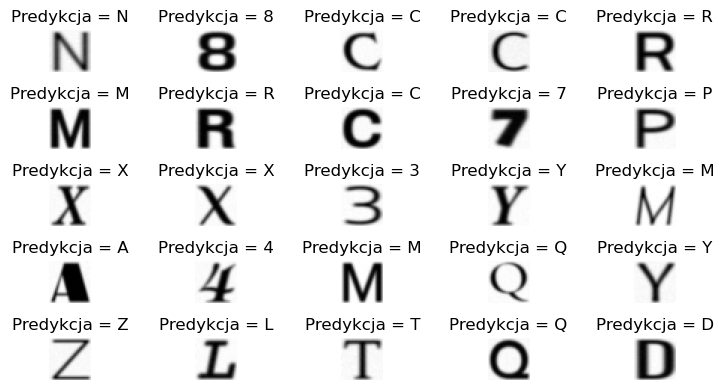

In [292]:
# liczba przykładowych obrazów do wyświetlenia
num_examples = 5 * 5

# wybieramy losowo indexy ze zb testowego
random_indices = random.sample(range(len(X_test)), num_examples)

# wyswietlenie siatki obrazkow
fig, axes = plt.subplots(5, 5, figsize=(8, 4))

for i, idx in enumerate(random_indices):
    row = i // 5
    col = i % 5
    img = X_test[idx]
    axes[row, col].imshow(img, cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f"Predykcja = {predicted_labels[idx]}") 

plt.tight_layout()
plt.show()


# Macierz omyłek

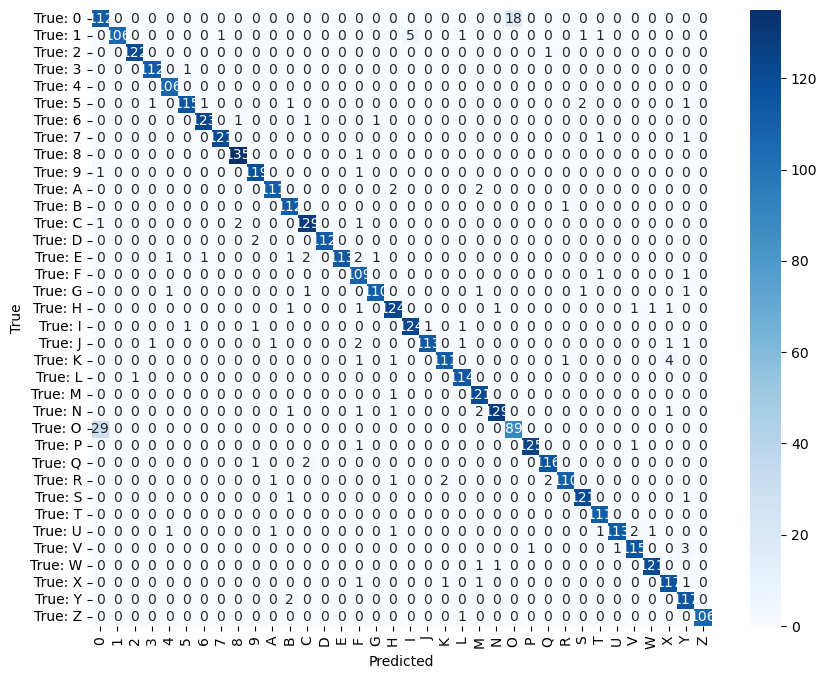

In [290]:
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')

# Dodawanie etykiet do wierszy i kolumn
class_labels = list(class_mapping.values())
tick_labels = ['True: ' + label for label in class_labels]
plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=90)
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=tick_labels, rotation=0)

plt.show()


# Wnioski

1. **Model baseline KNN** na zbiorze testowym osiąga **dokładność: 0.9330**
2. Pierwszy model **CNN wybrany eksperymentalnie** osiąga **dokładność: 0.9612 i stratę: 0.1669**
    - tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    - tf.keras.layers.MaxPooling2D((2, 2)),
    - tf.keras.layers.Flatten(),
    - tf.keras.layers.Dense(64, activation='relu'),
    - tf.keras.layers.Dense(36, activation='softmax')
3. Model **CNN docelowy** sparametryzowany metodą grid-search osiąga **dokładność: 0.9621 i stratę: 0.1487**
    - tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    - tf.keras.layers.MaxPooling2D((2, 2)),
    - tf.keras.layers.Flatten(),
    - tf.keras.layers.Dense(64, activation='relu'),
    - tf.keras.layers.Dense(36, activation='softmax')

Accuracy na poziomie 0.9621 to zadowalająca miara jakości modelu.\
Z macierzy omyłek widzimy, że najwięcej nietrafionych predykcji mamy dla "0" i "O", które i dla ludzkiego oka bywają czasami trudne do rozróżnienia z uwagi na swoje podobieństwo.